<h1> IB labs -- T3 - Boundary Layer Measurements </h1>

In [13]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [14]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [15]:
rho_air = 1.225 # kg/m^3
mu_air = 1.7894e-5 # kg/(m*s)
L = 0.735
rho_manometer = 815
g = 9.81
theta = 5 * np.pi / 180

Vel = lambda dh : np.sqrt(2 * rho_manometer * g * dh * 1e-3 * np.sin(theta) / rho_air)
Reynolds = lambda dh : rho_air * Vel(dh) * L / mu_air

In [16]:
# Laminar flow
# distance (in mm): replace with your own values
laminar_data = np.loadtxt('laminar.csv')

xl = laminar_data[:,0]
# manometer reading (in mm): replace with your own values
dh_l = laminar_data[:,1] - laminar_data[0,1]
dhinf_l = np.mean(laminar_data[:,2])
print(f'laminar free stream velocity = {Vel(dhinf_l):.2f} m/s')
print(f'laminar Reynolds number = {Reynolds(dhinf_l):.2f}')
#velocity ratio
vratiol = (dh_l/dhinf_l)**0.5

# Turbulent flow
# distance (in mm): replace with your own values
turbulent_data = np.loadtxt('turbulent.csv')

xt = turbulent_data[:,0]
# manometer reading (in mm): replace with your own values
dh_t = turbulent_data[:,1] - turbulent_data[0,1]
dhinf_t = np.mean(turbulent_data[:,2])
print(f'turbulent free stream velocity = {Vel(dhinf_t):.2f} m/s')
print(f'turbulent Reynolds number = {Reynolds(dhinf_t):.2f}')
vratiot = (dh_t/dhinf_t)**0.5

laminar free stream velocity = 3.38 m/s
laminar Reynolds number = 170246.11
turbulent free stream velocity = 3.40 m/s
turbulent Reynolds number = 171269.03


**Plot velocity ratio profile $V/V_{\infty}$ as a function of distance from wall**

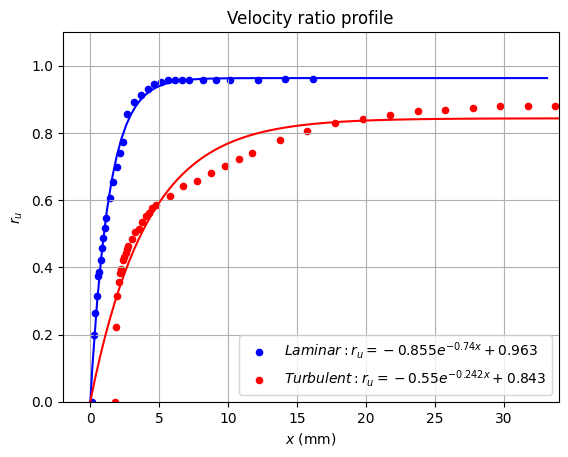

In [17]:

# Plot
def func(x, a, b, c):
    return a * np.exp( - b * x) + c

def inverse_func(y, a, b, c):
    return np.log((y-c)/a)/(-b)

# Curve fit
c_l, _ = curve_fit(func, xl, vratiol)
c_t, _ = curve_fit(func, xt, vratiot)

dxl = inverse_func(0, *c_l)
dxt = inverse_func(0, *c_t)
x = np.linspace(dxt , xt[-1] + 1, 100)
plt.plot(x - dxl, func(x, *c_l), c = 'blue')
plt.plot(x - dxt, func(x, *c_t), c = 'red')


al,bl,cl = np.round(c_l, 3).astype('str')
label_l = '$Laminar: r_u='+al+'e^{-'+bl+'x} + '+cl+'$'
plt.scatter(xl - dxl, vratiol, c = 'blue', label = label_l, s=20)
at,bt,ct = np.round(c_t, 3).astype('str')
label_t = '$Turbulent: r_u='+at+'e^{-'+bt+'x} + '+ct+'$'
plt.scatter(xt - dxt, vratiot, c = 'red', label = label_t, s=20)

plt.xlabel('$x$ (mm)')
plt.ylabel('$r_u$')
plt.ylim(0, 1.1)
plt.xlim(-2, 34)

plt.title('Velocity ratio profile')
plt.legend()
plt.grid()


plt.savefig('velocity_profiles.png', dpi = 300)
plt.show()

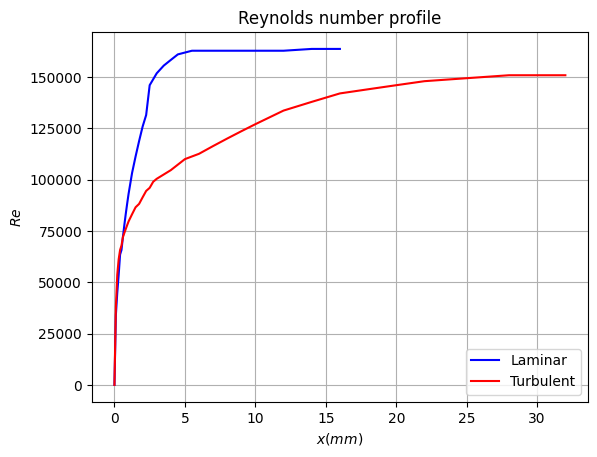

In [18]:
plt.plot(xl, Reynolds(dh_l), c = 'blue', label = 'Laminar')
plt.plot(xt, Reynolds(dh_t), c = 'red', label = 'Turbulent')
plt.xlabel('$ x (mm) $')
plt.ylabel('$ Re $')
plt.title('Reynolds number profile')
plt.legend()
plt.grid()
plt.show()

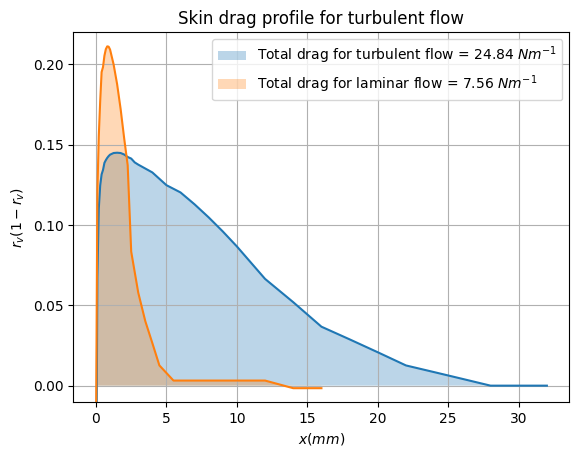

In [19]:
vratiot_expr = (1 - vratiot) * vratiot
vratiot_expr_final = np.mean(vratiot_expr[-3:])
vratiot_expr_corrected = vratiot_expr - vratiot_expr_final
vratiol_expr = (1 - vratiol) * vratiol
vratiol_expr_final = np.mean(vratiol_expr[-3:])
vratiol_expr_corrected = vratiol_expr - vratiol_expr_final

# calculate loss of momentum flux to calculate skin drag
area_t = np.trapz(vratiot_expr_corrected, xt)
Mdot_t = rho_air * Vel(dhinf_t)**2 * area_t
area_label_t = 'Total drag for turbulent flow = $' + str(np.round(Mdot_t,2)) + '$ $Nm^{-1} $'
area_l = np.trapz(vratiol_expr_corrected, xl)
Mdot_l = rho_air * Vel(dhinf_l)**2 * area_l
area_label_l = 'Total drag for laminar flow = $' + str(np.round(Mdot_l,2)) + '$ $Nm^{-1} $'

plt.fill_between(xt, vratiot_expr_corrected, alpha=0.3, label = area_label_t)
plt.fill_between(xl, vratiol_expr_corrected, alpha=0.3, label=area_label_l)

plt.plot(xt, vratiot_expr_corrected)
plt.plot(xl, vratiol_expr_corrected)

plt.xlabel('$ x (mm) $')
plt.ylabel('$ r_v(1-r_v) $')

plt.ylim(-0.01, 0.22)
plt.title('Skin drag profile for turbulent flow')
plt.legend()
plt.grid()
plt.savefig('drag_profiles.png', dpi = 300)
plt.show()

In [20]:
# initial gradients
grad_l = (vratiol[1] - vratiol[0])/(xl[1] - xl[0])
grad_t = (vratiot[1] - vratiot[0])/(xt[1] - xt[0])
 
# the skin drag at the wall can be calcualted using the initial gradient
skin_drag_l = mu_air * Vel(dhinf_l) * grad_l * 1e3
skin_drag_t = mu_air * Vel(dhinf_t) * grad_t * 1e3
print(f'laminar skin drag = {skin_drag_l}')
print(f'turbulent skin drag = {skin_drag_t}')


laminar skin drag = 0.12071067942614863
turbulent skin drag = 0.13495864240352676


**Drag of spheres**

Enter the data for the measurements of the mass of spheres


In [21]:
# data for mass of spheres (m (g), D (mm), t(s))
m = np.array([2.426, 8.439, 1.453, 2.325]) * 1e-3 # m
D = np.array([15.63, 12.65, 12.6, 15.41]) * 1e-3 # m
t = np.array([5, 0.8, 8.2, 5.1]) # s
#          water   glycerol oil     water
liquid = ['water', 'glycerol','oil','water']
colors = ['blue', 'grey', 'brown', 'blue']
# fluid viscosity (kg/m/s)
mus  = np.array([1.0E-3, 1513.0E-3, 48.7E-3, 1.0E-3]) # kg/m/s
# fluid density (kg/m3)
rho0  = np.array([1000., 1261., 870., 1000.]) # kg/m3
# height of drop (mm)
tube_h = 1025 * 1e-3 # m
# calculate velocity
Vs = tube_h/t # m/s
# Volume
V = np.pi*D**3/6 # m3
# Area
A = np.pi*D**2/4 # m2

g = 9.81 # m/s2
rho_ball = m/V # kg/m3

print((m*g - rho0 * V * g))

Cd = (m * g - rho0 * V * g)/(0.5 * rho_ball * Vs**2 * A)
ReD = rho0 * Vs * D / mus
# Cd = ...
# complete your sheet here
print('Cd = ', Cd)
print('ReD = ', ReD)

[0.00418604 0.06967503 0.00531473 0.00401181]
Cd =  [0.85566179 0.08482965 3.93282912 0.87771125]
ReD =  [3204.15         13.50829581   28.13655031 3097.10784314]


C:\Users\louis\AppData\Local\Temp\ipykernel_17912\4239691057.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.loglog(ReD[i], Cd[i], 'ro-', c = colors[i], label = liquid[i])
C:\Users\louis\AppData\Local\Temp\ipykernel_17912\4239691057.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.loglog(ReD[3], Cd[3], 'ro-', c = colors[3])


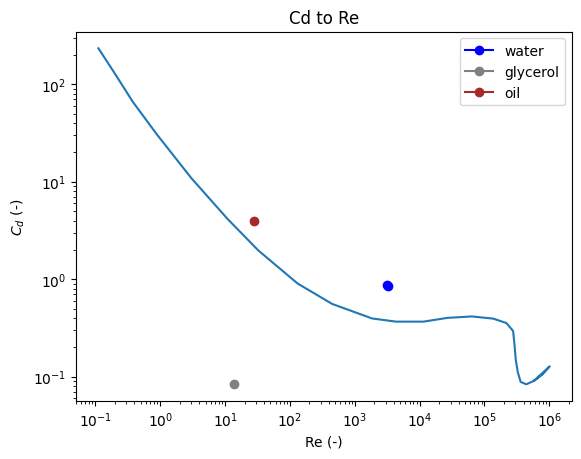

In [22]:
# Previous experimental curve fit:
ReD_model = [0.111205779,0.190986898,0.379328545,0.872859896,2.986757994,10.78471291,32.64400842,131.3147426,448.0331753,1851.754986,4346.391687,11468.43086,26696.02154,64091.71667,136855.5307,217356.4122,276307.7592,290002.7746,304148.4946,326173.737,361306.8802,441123.6656,580961.1903,773934.143,999350.5444,580961.1903,773934.143,999350.5444]
Cd_model = [234.2135866,134.911165,65.871184,31.07550634,10.99037585,4.192991504,1.972105036,0.904672821,0.558220724,0.396105462,0.367516765,0.367584114,0.401747281,0.415627382,0.394551304,0.355817824,0.294785733,0.214700657,0.148070044,0.111406027,0.088489415,0.083605731,0.09095536,0.105633483,0.12680684,0.09095536,0.105633483,0.12680684]
# Plot
plt.title('Cd to Re')
plt.xlabel('Re (-)')
plt.ylabel('$C_d$ (-)')
#plt.show()

# overlay your data here by adding elements to the plot.
for i in range(Cd.size - 1):
    plt.loglog(ReD[i], Cd[i], 'ro-', c = colors[i], label = liquid[i])

plt.loglog(ReD[3], Cd[3], 'ro-', c = colors[3])

plt.loglog(ReD_model, Cd_model)

plt.legend()

plt.savefig('CdRe_graph.png', dpi = 300)
plt.show()

In [23]:

Re_lt_boundary = 2e5
Cd_l = Mdot_l / (0.5 * rho_air * Vel(dhinf_l)**2 * L)
Cd_t = Mdot_t / (0.5 * rho_air * Vel(dhinf_t)**2 * L)

plt.loglog(ReD_model, Cd_model)

plt.loglog(Re_lt_boundary, Cd_l, 'ro-', c = 'b', label = 'laminar')
plt.loglog(Re_lt_boundary, Cd_t, 'ro-', c = 'r', label = 'turbulent')

plt.title('Cd to Re')
plt.xlabel('Re (-)')
plt.ylabel('$C_d $ (-)')

plt.legend()

plt.savefig('CdRe_mloss.png', dpi = 300)
plt.show()